In [ ]:
# In this notebook the pointing model built during April's run is evaluated. 

## Pointing accuracy

In [4]:

from lsst.pipe.tasks.quickFrameMeasurement import QuickFrameMeasurementTask
from lsst.summit.utils.bestEffort import BestEffortIsr
from lsst.geom import PointD
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import lsst.daf.butler as dafButler


In [5]:
# Call butler
REPO_DIR = '/repo/LATISS'
butler = dafButler.Butler(REPO_DIR, instrument='LATISS', collections = 'LATISS/raw/all')

In [6]:
# BestEffort ISR
bestEffort = BestEffortIsr()

# Configure quickFrameMeasurement Task
qm_config = QuickFrameMeasurementTask.ConfigClass()
qm = QuickFrameMeasurementTask(config=qm_config)

# Brightest Centroid - boresight position. (Center of detector) 

In [7]:
def calculate_xy_offsets(exp):
    pixel_scale = 0.09569  # arcsec/pixel
    boresight_position = PointD(2036.5, 2000.5)
    #boresight_position = PointD(2088.5, 2006.5)


    """Returns x/y offset in arcseconds from an exp based on current centroid
    and desired position (which is the boresight position in pixels)"""

    #Measure Centroids
    result = qm.run(exp)
    centroids = PointD(result.brightestObjCentroid[0], result.brightestObjCentroid[1])


    dx_arcsec, dy_arcsec = pixel_scale * (
        centroids - boresight_position
    )

    dr_arcsec = np.sqrt(dx_arcsec**2 + dy_arcsec**2)

    return dx_arcsec, dy_arcsec, dr_arcsec

In [8]:
def get_azel(exp):
    info = exp.getInfo()
    vi = info.getVisitInfo()
    
    azAlt = vi.getBoresightAzAlt()
    az = azAlt[0].asDegrees()
    el = azAlt[1].asDegrees()
    
    return az, el

In [ ]:
# Exposures 2022050300186 to 2022050300243

In [9]:
# Measure x, y and r pointing error for each sequence.

line= [] 

for exposure in np.arange(2022050500291,2022050500402,2):
    print(exposure) 
    
    data_id = {'instrument': 'LATISS', 'exposure': exposure, 'detector':0}

    exp = bestEffort.getExposure(data_id)
    
    dx, dy, dr = calculate_xy_offsets(exp)
    
    az, el = get_azel(exp)
    
    line.append(
        {'exposures': exposure,
         'azimuth': az,
         'elevation': el, 
         'dx_origin':dx,  
         'dy_origin': dy,
         'pointing_origin' : dr
        }
    )
    
df = pd.DataFrame(line)   

2022050500291


/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-3.0.0/Linux64/meas_algorithms/gf36ae6ace1+dd0c26d1c5/python/lsst/meas/algorithms/installGaussianPsf.py:77: FutureWarning: Default position argument overload is deprecated and will be removed in version 24.0.  Please explicitly specify a position.
  psfSigma = psfModel.computeShape().getDeterminantRadius()
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-3.0.0/Linux64/meas_algorithms/gf36ae6ace1+dd0c26d1c5/python/lsst/meas/algorithms/installGaussianPsf.py:78: FutureWarning: Default position argument overload is deprecated and will be removed in version 24.0.  Please explicitly specify a position.
  width, height = psfModel.computeImage().getDimensions()


2022050500293


2022050500295


2022050500297


2022050500299


2022050500301


2022050500303


2022050500305


2022050500307


2022050500309


2022050500311


2022050500313


2022050500315


2022050500317


2022050500319


2022050500321


2022050500323


2022050500325


2022050500327


2022050500329


2022050500331


2022050500333


2022050500335


2022050500337


2022050500339


2022050500341


2022050500343


2022050500345


2022050500347


2022050500349


2022050500351


2022050500353


2022050500355


2022050500357


2022050500359


2022050500361


2022050500363


2022050500365


2022050500367


2022050500369


2022050500371


2022050500373


2022050500375


2022050500377


2022050500379


2022050500381


2022050500383


2022050500385


2022050500387


2022050500389


2022050500391


2022050500393


2022050500395


2022050500397


2022050500399


2022050500401


In [10]:
df

,exposures,azimuth,elevation,dx_origin,dy_origin,pointing_origin
0,2022050500291,359.176665,29.703517,2.329899,0.291350,2.348045
1,2022050500293,15.376505,48.212144,-0.224445,0.407905,0.465577
2,2022050500295,21.215347,72.202084,-0.877286,0.014982,0.877414
3,2022050500297,22.197029,34.095184,-0.170732,-0.380360,0.416921
4,2022050500299,33.629942,44.232408,1.236717,-0.760534,1.451854
5,2022050500301,44.761899,24.844817,8.245214,-4.153982,9.232503
6,2022050500303,45.290434,53.749934,-0.332890,-2.792454,2.812226
7,2022050500305,46.163913,82.986581,-1.243686,3.202677,3.435680
8,2022050500307,55.981129,35.677169,3.378297,0.845457,3.482483
9,2022050500309,67.320862,33.502362,3.403868,1.339581,3.657976


In [71]:
# Delete sequence 210  (two bright stars) 
df = df.drop([11,12])

In [11]:
df.to_csv('PointingMay5th.txt')

In [64]:
df = pd.read_csv('PointingMay5th.txt') 

In [65]:
df

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,exposures,azimuth,elevation,dx_origin,dy_origin,pointing_origin
0,0,0,0,0,2022050300186,15.179452,38.574614,9.067422,-14.778805,17.338720
1,1,1,1,1,2022050300188,22.688426,65.954237,0.250600,-14.561527,14.563683
2,2,2,2,2,2022050300190,45.131015,70.651670,-1.851978,-12.663460,12.798165
3,3,3,3,3,2022050300192,60.328573,33.119514,6.976247,-14.624754,16.203440
4,4,4,4,4,2022050300194,74.956338,48.491493,1.696785,-15.492281,15.584924
5,5,5,5,5,2022050300196,105.188835,35.626345,7.565717,-18.945330,20.400137
6,6,6,6,6,2022050300198,112.206536,52.255204,2.340396,-18.334392,18.483165
7,7,7,7,7,2022050300200,119.534492,26.572608,11.843504,-21.493764,24.540792
8,8,8,8,8,2022050300202,135.336476,47.146137,4.964627,-22.501140,23.042326
9,9,9,9,9,2022050300204,134.794695,20.689605,16.165042,-17.917245,24.131644


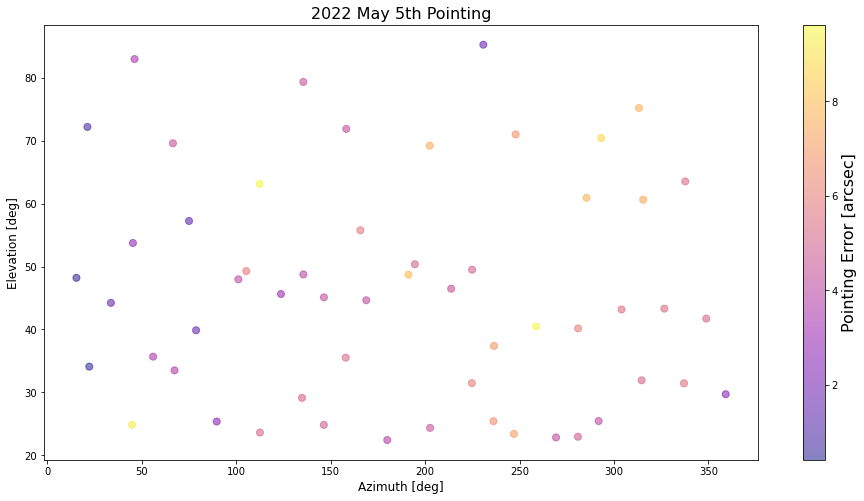

In [13]:
%matplotlib inline
fig = plt.figure(figsize=(16,8))
plt.scatter(df['azimuth'], df['elevation'], 
            s=50, alpha=0.5, c=df['pointing_origin'], label=f'Pointing Error', cmap='plasma')
plt.title('2022 May 5th Pointing', fontsize = 16)
plt.colorbar().set_label('Pointing Error [arcsec]',fontsize=16)
plt.ylabel('Elevation [deg]',fontsize=12)
plt.xlabel('Azimuth [deg]',fontsize=12)
plt.show()

In [14]:
# Points with offset larger than 10 arcsec
(df[df['pointing_origin']>30]) 

,exposures,azimuth,elevation,dx_origin,dy_origin,pointing_origin


***

In [16]:
# Calculate pointing accuracy RMS. 
rms = np.sqrt(((df['pointing_origin']**2).sum())/len(df))
print(f'The pointing accuracy RMS for the data is {rms:0.2f} arcsec')

The pointing accuracy RMS for the data is 5.36 arcsec
